# Import modules

In [1]:
#!/usr/bin/pythonpy
################################################################################
# PYTHON's MODULAE
# ------------------------------------------------------------------------------
################################################################################
import os
import sys
module_path = os.path.abspath(os.path.join('/lib/python3.8/site-packages'))
if module_path not in sys.path:
    sys.path.append(module_path)

import fortran_integral
import fortran_quad
import numpy as np
from numpy import sqrt as sqrt
from numpy import pi as pi

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.colorbar as colorb
import pickle 
import datetime
from matplotlib import colors

# Total cross sections
# Total cross sections
sys.path.append('../app/')
if module_path not in sys.path:
    sys.path.append(module_path)
import models.sigma0_xsections as sig0
import models.general_parameters as gp
import models.relic_density_calc as ohm
import models.radiative_factorization as hp
import models.pdf_integration as qcd
import utils.colorb_2D as cb2d
import lhapdf  


#################################################
today = datetime.date.today().strftime('%Y-%m-%d')
today = '2023-12-28'

## Some configurations

sigmaz = {}
## Geral parameters
brn = gp.brn
grx0 = gp.grx0 
glx0 = gp.glx0
gx0 = gp.gx0

dmnames = sig0.dmnames
smax = gp.smax
me = gp.mvec[0]

Mmed = gp.Mmed  # TeV
mx  = gp.mx #  0.80 * Mmed/2  DM mass [TeV]
Nf_ee = gp.Nf_ee 
Nf_qq = gp.Nf_qq


---
---
# 1 - $e^{+}e^{-}$ interaction

## Relic

### Data generation

In [8]:
binsize_ohm = 70
###################################################
###################################################
## storage \sigma grid in z
Mmed = 3.0  # mediator mass [TeV]
mx = (Mmed/2)*0.80 # DM mass [TeV]
smax = Mmed**2

gr = np.linspace(1E-3, 1, binsize_ohm) # right SM/DM coupling
gx = np.linspace(1E-3, 1, binsize_ohm) # DM coupling

# Define a grid
gr_grid, gx_grid = np.meshgrid(gr, gx) 

omegarelic_coup = {}
print('Doing coupling...')
row = 0
#  ## axial: gl = -gr ## chiral: gl = 0
process = 'ee'
Nf_x = gp.Nf_ee if process == 'ee' else gp.Nf_qq 

for fignumber, dmname in enumerate(sig0.dmnames):

    omegarelic_coup[dmname] = {}

    for cp in gp.cps:
    
        omegarelic_coup[dmname][cp] = {}

        if cp == 'V': #vetorial: gl = gr 
            param_lst = [smax, gp.me, Mmed, mx, gr_grid, gr_grid, gx_grid, dmname, Nf_x]
            omegarelic_coup[dmname][cp]['params'] = dict(zip(['s', 'mq', 'Mmed', 'mx', 'gr', 'gl', 'gx', 'dmname', 'Nf'], param_lst))

            omegarelic_coup[dmname][cp]['data'] = ohm.Ohm_numerical(smax, me, Mmed , mx, gr_grid, gr_grid, gx_grid, dmname, Nf_x)

        elif cp == 'AV': # axial: gl = -gr
            param_lst = [smax, gp.me, Mmed, mx, gr_grid, -gr_grid, gx_grid, dmname, Nf_x]
            omegarelic_coup[dmname][cp]['params'] = dict(zip(['s', 'mq', 'Mmed', 'mx', 'gr', 'gl', 'gx', 'dmname', 'Nf'], param_lst))

            omegarelic_coup[dmname][cp]['data'] = ohm.Ohm_numerical(smax, me, Mmed , mx, gr_grid, -gr_grid, gx_grid, dmname, Nf_x)

        else: # chiral: gl = 0
            param_lst = [smax, gp.me, Mmed, mx, gr_grid, 0, gx_grid, dmname, Nf_x]
            omegarelic_coup[dmname][cp]['params'] = dict(zip(['s', 'mq', 'Mmed', 'mx', 'gr', 'gl', 'gx', 'dmname', 'Nf'], param_lst))

            omegarelic_coup[dmname][cp]['data'] = ohm.Ohm_numerical(smax, me, Mmed , mx, gr_grid, 0, gx_grid, dmname, Nf_x)


    gp.save_obj(omegarelic_coup[dmname], f'../myruns/{today}_omegarelic_coup_{process}_{dmname}_binsize_{binsize_ohm}.pkl')
    print(f'Done for {dmname}')



Doing coupling...
Objeto salvo em ../myruns/2023-10-28_omegarelic_coup_ee_Scalar_binsize_70.pkl
Done for Scalar
Objeto salvo em ../myruns/2023-10-28_omegarelic_coup_ee_Fermion_binsize_70.pkl
Done for Fermion
Objeto salvo em ../myruns/2023-10-28_omegarelic_coup_ee_Vector_binsize_70.pkl
Done for Vector


### Plot

/mnt/c/Users/Marcio/resonant-dm-relic/notebooks/utils/colorb_2D.py:408: UserWarning: The following kwargs were not used by contour: 'rasterized'
  countour_relic_line = ax[fignumber].contour(gr_grid_ohm, gx_grid_ohm, data_object[dmname][cp]['data'], ohm.planckdata1, colors='k', linewidths=2, linestyles='dashed', rasterized=True)


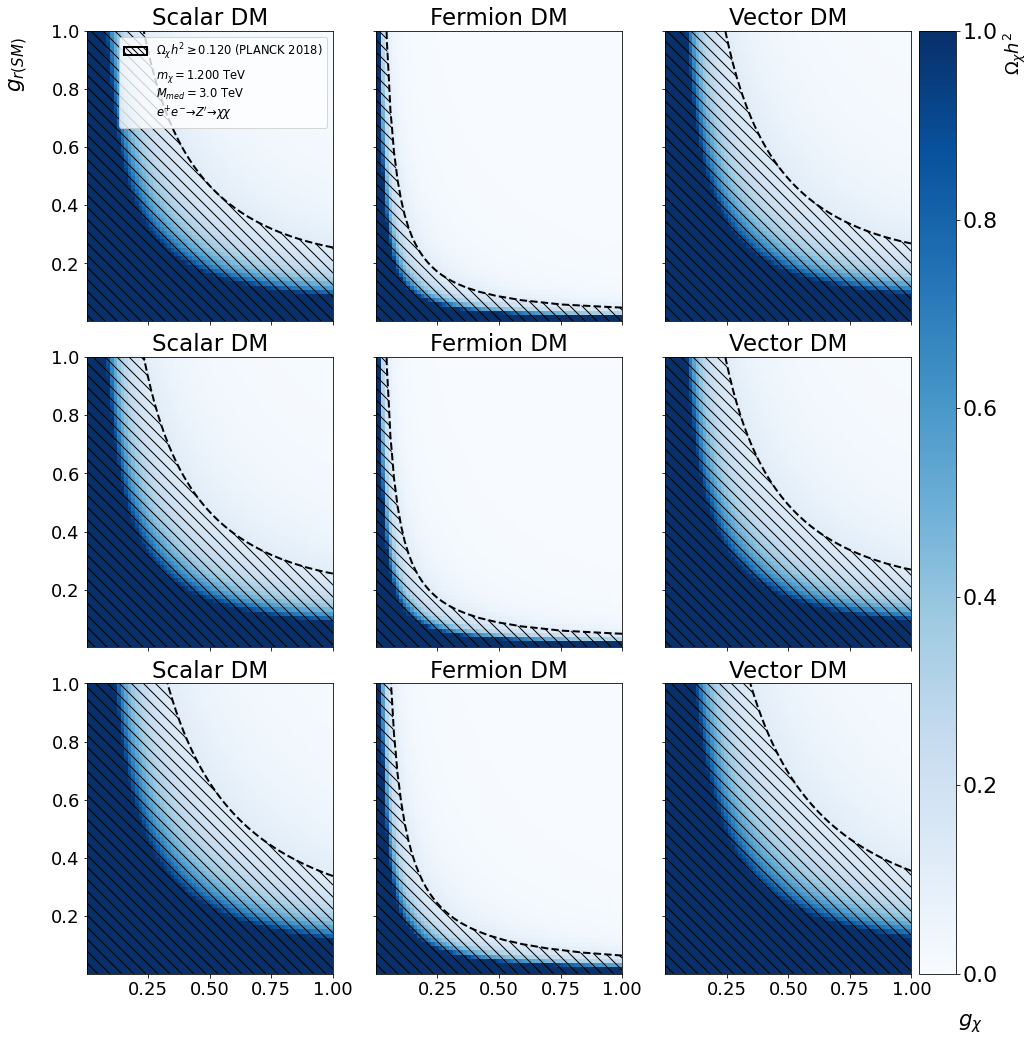

In [2]:
process = 'ee'
binsize_ohm = 70
omegarelic_coup = {}
for dmname in sig0.dmnames:
    omegarelic_coup[dmname]  = gp.load_obj(f'../myruns/{today}_omegarelic_coup_{process}_{dmname}_binsize_{binsize_ohm}.pkl')

cb2d.cb_plot3x3_relic(process, f'7-omega-relic-{process}-coup', omegarelic_coup, sig0.dmnames)

## Couplings

### Data generation

In [9]:
binsize = 100
###################################################
###################################################
## storage \sigma grid in z
Mmed = 3.0  # mediator mass [TeV]
mx = (Mmed/2)*0.80 # DM mass [TeV]
smax = Mmed**2
gr = np.linspace(1E-3, 1.1, binsize) # right SM/DM coupling
gx = np.linspace(1E-3, 1.1, binsize) # DM coupling
# Define a grid
gr_grid, gx_grid = np.meshgrid(gr, gx) 

print('Doing coupling...')
row = 0
#  ## axial: gl = -gr ## chiral: gl = 0
process = 'ee'
Nf_x = gp.Nf_ee if process == 'ee' else gp.Nf_qq

@np.vectorize
def sigmap(s, mq, Mmed, mx, gr, gl, gx, Nf_x):
    sigmatot =  hp.HPhsig(s, mq, Mmed, mx, gr, gl, gx, sig0.SFV(dmname).sig0, Nf_x) 
    return sigmatot 

sigmaz = {}

for fignumber, dmname in enumerate(sig0.dmnames):

    sigmaz[dmname] = {}

    for cp in gp.cps:
    
        sigmaz[dmname][cp] = {}

        if cp == 'V': #vetorial: gl = gr 
            param_lst = [smax, gp.me, Mmed, mx, gr_grid, gr_grid, gx_grid, dmname, Nf_x]
            sigmaz[dmname][cp]['params'] = dict(zip(['s', 'mq', 'Mmed', 'mx', 'gr', 'gl', 'gx', 'dmname', 'Nf'], param_lst))

            sigmaz[dmname][cp]['data'] = sigmap(smax, me, Mmed, mx, gr_grid, gr_grid, gx_grid, Nf_x)
            sigmaz[dmname][cp]['data'] = np.array(list(sigmaz[dmname][cp]['data'][:, :]), dtype=np.float)

        elif cp == 'AV': # axial: gl = -gr
            param_lst = [smax, gp.me, Mmed, mx, gr_grid, -gr_grid, gx_grid, dmname, Nf_x]
            sigmaz[dmname][cp]['params'] = dict(zip(['s', 'mq', 'Mmed', 'mx', 'gr', 'gl', 'gx', 'dmname', 'Nf'], param_lst))

            sigmaz[dmname][cp]['data'] = sigmap(smax, me, Mmed, mx, gr_grid, -gr_grid, gx_grid, Nf_x)
            sigmaz[dmname][cp]['data'] = np.array(list(sigmaz[dmname][cp]['data'][:, :]), dtype=np.float)

        else: # chiral: gl = 0
            param_lst = [smax, gp.me, Mmed, mx, gr_grid, 0, gx_grid, dmname, Nf_x]
            sigmaz[dmname][cp]['params'] = dict(zip(['s', 'mq', 'Mmed', 'mx', 'gr', 'gl', 'gx', 'dmname', 'Nf'], param_lst))

            sigmaz[dmname][cp]['data'] = sigmap(smax, me, Mmed, mx, gr_grid, 0, gx_grid, Nf_x)
            sigmaz[dmname][cp]['data'] = np.array(list(sigmaz[dmname][cp]['data'][:, :]), dtype=np.float)


    gp.save_obj(sigmaz[dmname], f'../myruns/{today}_sigmaz_coup_{process}_{dmname}_binsize_{binsize}.pkl')
    print(f'Done for {dmname}')



Doing coupling...


/tmp/ipykernel_3253/4080241678.py:39: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sigmaz[dmname][cp]['data'] = np.array(list(sigmaz[dmname][cp]['data'][:, :]), dtype=np.float)
/tmp/ipykernel_3253/4080241678.py:46: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sigmaz[dmname][cp]['data'] = np.array(list(sigmaz[dmname][cp]['data'][:, :]), 

Objeto salvo em ../myruns/2023-10-28_sigmaz_coup_ee_Scalar_binsize_100.pkl
Done for Scalar
Objeto salvo em ../myruns/2023-10-28_sigmaz_coup_ee_Fermion_binsize_100.pkl
Done for Fermion
Objeto salvo em ../myruns/2023-10-28_sigmaz_coup_ee_Vector_binsize_100.pkl
Done for Vector


### Plot

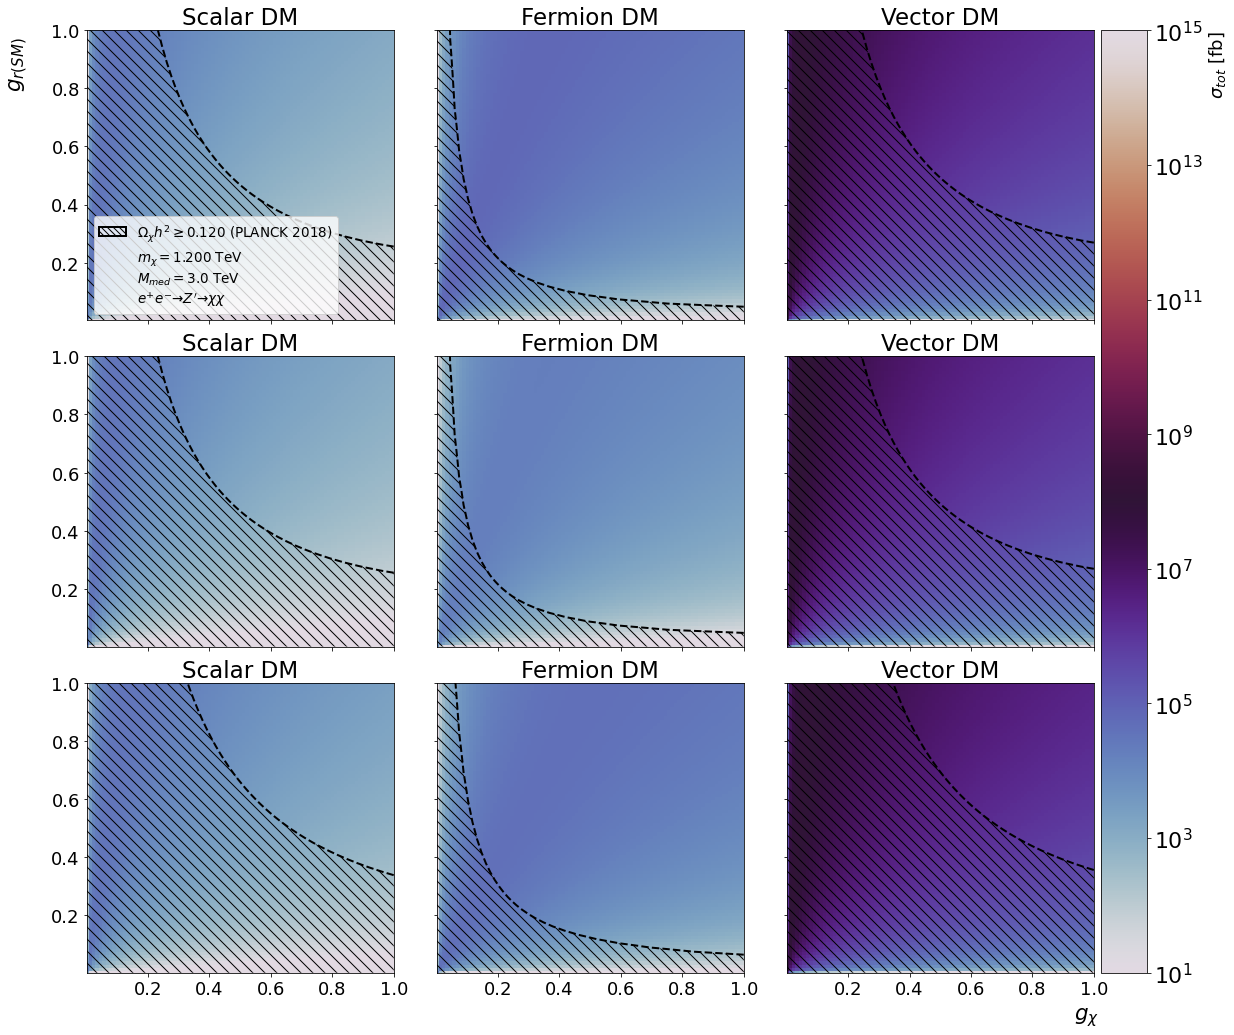

In [3]:
process = 'ee'
binsize_ohm = 70
omegarelic_coup = {}
for dmname in sig0.dmnames:
    omegarelic_coup[dmname]  = gp.load_obj(f'../myruns/{today}_omegarelic_coup_{process}_{dmname}_binsize_{binsize_ohm}.pkl')


binsize = 100
sigmaz = {}
for dmname in sig0.dmnames:
    sigmaz[dmname]  = gp.load_obj(f'../myruns/{today}_sigmaz_coup_{process}_{dmname}_binsize_{binsize}.pkl')

cb2d.cb_plot3x3(process, f'12-coupxcoup-{process}-ISR', sigmaz, omegarelic_coup, sig0.dmnames)

# 2 - $q \bar q$ interaction 

## 2.1 Relic

In [10]:
binsize_ohm = 70
###################################################
###################################################
## storage \sigma grid in z
Mmed = 3.0  # mediator mass [TeV]
mx = (Mmed/2)*0.80 # DM mass [TeV]
smax = Mmed**2

gr = np.linspace(1E-3, 1, binsize_ohm) # right SM/DM coupling
gx = np.linspace(1E-3, 1, binsize_ohm) # DM coupling

# Define a grid
gr_grid, gx_grid = np.meshgrid(gr, gx) 

omegarelic_coup = {}
print('Doing coupling...')
row = 0
#  ## axial: gl = -gr ## chiral: gl = 0
process = 'qq'
Nf_x = gp.Nf_ee if process == 'ee' else gp.Nf_qq 

for fignumber, dmname in enumerate(sig0.dmnames):

    omegarelic_coup[dmname] = {}

    for cp in gp.cps:
    
        omegarelic_coup[dmname][cp] = {}

        if cp == 'V': #vetorial: gl = gr 
            param_lst = [smax, gp.me, Mmed, mx, gr_grid, gr_grid, gx_grid, dmname, Nf_x]
            omegarelic_coup[dmname][cp]['params'] = dict(zip(['s', 'mq', 'Mmed', 'mx', 'gr', 'gl', 'gx', 'dmname', 'Nf'], param_lst))

            omegarelic_coup[dmname][cp]['data'] = ohm.Ohm_numerical(smax, me, Mmed , mx, gr_grid, gr_grid, gx_grid, dmname, Nf_x)

        elif cp == 'AV': # axial: gl = -gr
            param_lst = [smax, gp.me, Mmed, mx, gr_grid, -gr_grid, gx_grid, dmname, Nf_x]
            omegarelic_coup[dmname][cp]['params'] = dict(zip(['s', 'mq', 'Mmed', 'mx', 'gr', 'gl', 'gx', 'dmname', 'Nf'], param_lst))

            omegarelic_coup[dmname][cp]['data'] = ohm.Ohm_numerical(smax, me, Mmed , mx, gr_grid, -gr_grid, gx_grid, dmname, Nf_x)

        else: # chiral: gl = 0
            param_lst = [smax, gp.me, Mmed, mx, gr_grid, 0, gx_grid, dmname, Nf_x]
            omegarelic_coup[dmname][cp]['params'] = dict(zip(['s', 'mq', 'Mmed', 'mx', 'gr', 'gl', 'gx', 'dmname', 'Nf'], param_lst))

            omegarelic_coup[dmname][cp]['data'] = ohm.Ohm_numerical(smax, me, Mmed , mx, gr_grid, 0, gx_grid, dmname, Nf_x)


    gp.save_obj(omegarelic_coup[dmname], f'../myruns/{today}_omegarelic_coup_{process}_{dmname}_binsize_{binsize_ohm}.pkl')
    print(f'Done for {dmname}')



Doing coupling...
Objeto salvo em ../myruns/2023-10-28_omegarelic_coup_qq_Scalar_binsize_70.pkl
Done for Scalar
Objeto salvo em ../myruns/2023-10-28_omegarelic_coup_qq_Fermion_binsize_70.pkl
Done for Fermion
Objeto salvo em ../myruns/2023-10-28_omegarelic_coup_qq_Vector_binsize_70.pkl
Done for Vector


/mnt/c/Users/Marcio/resonant-dm-relic/notebooks/utils/colorb_2D.py:408: UserWarning: The following kwargs were not used by contour: 'rasterized'
  countour_relic_line = ax[fignumber].contour(gr_grid_ohm, gx_grid_ohm, data_object[dmname][cp]['data'], ohm.planckdata1, colors='k', linewidths=2, linestyles='dashed', rasterized=True)


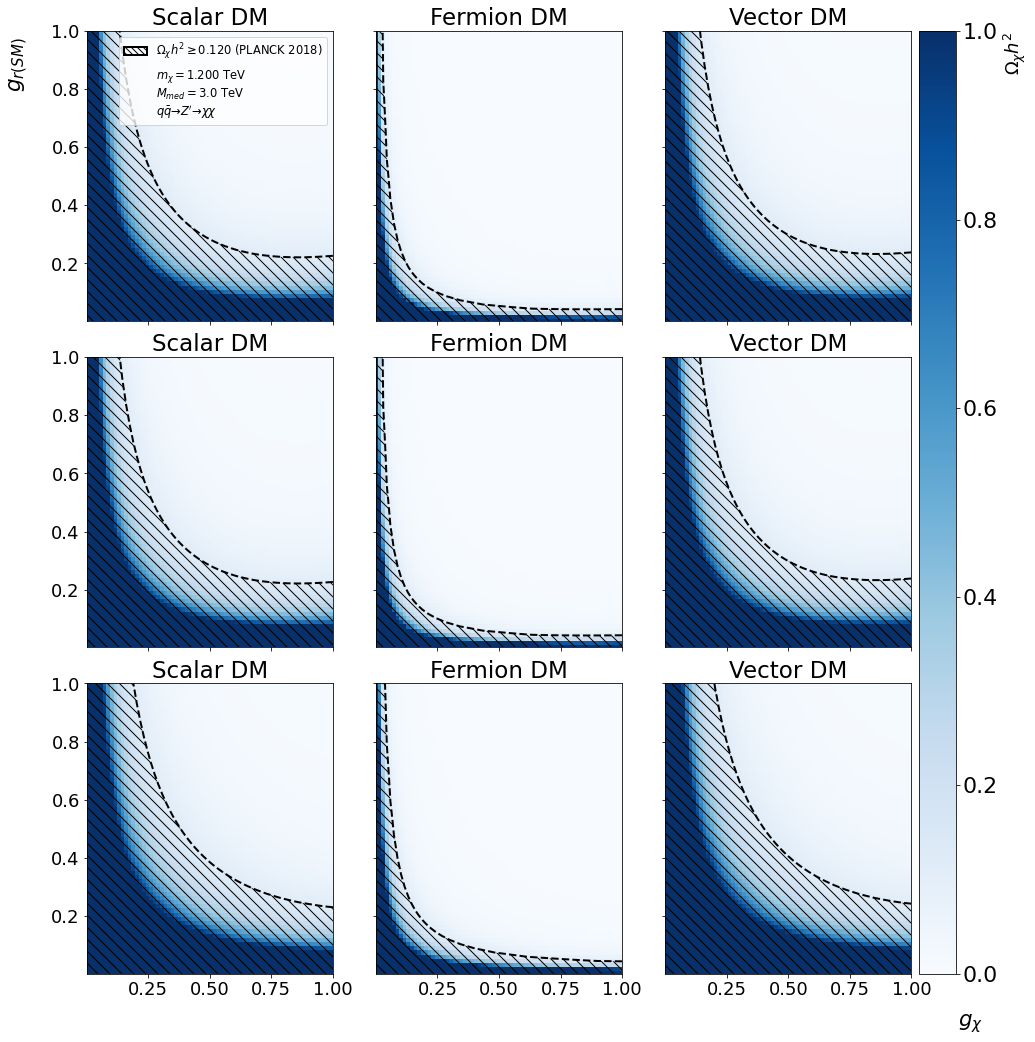

In [4]:
process = 'qq'
binsize_ohm = 70
omegarelic_coup = {}
for dmname in sig0.dmnames:
    omegarelic_coup[dmname]  = gp.load_obj(f'../myruns/{today}_omegarelic_coup_{process}_{dmname}_binsize_{binsize_ohm}.pkl')

cb2d.cb_plot3x3_relic(process, f'8-omega-relic-{process}-coup', omegarelic_coup, sig0.dmnames)

## 2.2 Coupling

### Data generation

## coupling qq - ISR

In [11]:
binsize = 100

gr = np.arange(1E-3, 1.1, 1/binsize) # right SM/DM coupling
gx = np.arange(1E-3, 1.1, 1/binsize) # DM coupling
# Define a grid
gr_grid, gx_grid = np.meshgrid(gr, gx) 

#define pdf
PDF_sets = ['CT10', 'NNPDF31_lo_as_0118', 'CT18NLO', 'MMHT2014lo68cl', 'PDF4LHC15_nlo_100']
pdf = lhapdf.mkPDF(PDF_sets[1], 0)
s_max = (14)**2 
process = 'qq'
Nf_x = gp.Nf_ee if process == 'ee' else gp.Nf_qq
sigmaz = {}
sighat_hphoton = {}

for fignumber, dmname in enumerate(sig0.dmnames):

    sigmaz[dmname] = {}
    sighat_hphoton[dmname] = {}
    sig0funcs = sig0.SFV(dmname).sig0

    for cp in gp.cps:
    
        sigmaz[dmname][cp] = {}
        sighat_hphoton[dmname][cp] = {}

        if cp == 'V': #vetorial: gl = gr 
            param_lst = [smax, gp.me, Mmed, mx, gr_grid, gr_grid, gx_grid, dmname, Nf_x]
            sigmaz[dmname][cp]['params'] = dict(zip(['s', 'mq', 'Mmed', 'mx', 'gr', 'gl', 'gx', 'dmname', 'Nf'], param_lst))

            sighat_hphoton[dmname][cp] = hp.HPhsig(Mmed**2, me, Mmed, mx, gr_grid, gr_grid, gx_grid, sig0funcs, Nf_x)
            sigmaz[dmname][cp]['data'] = qcd.dsigdM2_ISR(pdf, s_max, (Mmed)**2/s_max, Mmed, 1, mx, gr_grid, gr_grid, gx_grid, sighat_hphoton[dmname][cp])
            sigmaz[dmname][cp]['data'] = np.array(list(sigmaz[f'{dmname}'][cp]['data'][:, :]), dtype=np.float)


        elif cp == 'AV': # axial: gl = -gr
            param_lst = [smax, gp.me, Mmed, mx, gr_grid, -gr_grid, gx_grid, dmname, Nf_x]
            sigmaz[dmname][cp]['params'] = dict(zip(['s', 'mq', 'Mmed', 'mx', 'gr', 'gl', 'gx', 'dmname', 'Nf'], param_lst))

            sighat_hphoton[dmname][cp] = hp.HPhsig(Mmed**2, me, Mmed, mx, gr_grid, -gr_grid, gx_grid, sig0funcs, Nf_x)
            sigmaz[dmname][cp]['data'] = qcd.dsigdM2_ISR(pdf, s_max, (Mmed)**2/s_max, Mmed, 1, mx, gr_grid, -gr_grid, gx_grid, sighat_hphoton[dmname][cp])
            sigmaz[dmname][cp]['data'] = np.array(list(sigmaz[f'{dmname}'][cp]['data'][:, :]), dtype=np.float)

        else: # chiral: gl = 0
            param_lst = [smax, gp.me, Mmed, mx, gr_grid, 0, gx_grid, dmname, Nf_x]
            sigmaz[dmname][cp]['params'] = dict(zip(['s', 'mq', 'Mmed', 'mx', 'gr', 'gl', 'gx', 'dmname', 'Nf'], param_lst))

            sighat_hphoton[dmname][cp] = hp.HPhsig(Mmed**2, me, Mmed, mx, gr_grid, 0, gx_grid, sig0funcs, Nf_x)
            sigmaz[dmname][cp]['data'] = qcd.dsigdM2_ISR(pdf, s_max, (Mmed)**2/s_max, Mmed, 1, mx, gr_grid, 0, gx_grid, sighat_hphoton[dmname][cp])
            sigmaz[dmname][cp]['data'] = np.array(list(sigmaz[f'{dmname}'][cp]['data'][:, :]), dtype=np.float)


    gp.save_obj(sigmaz[dmname], f'../myruns/{today}_sigmaz_coup_{process}_{dmname}_binsize_{binsize}.pkl')
    print(f'Done for {dmname}')


LHAPDF 6.5.3 loading /share/LHAPDF/NNPDF31_lo_as_0118/NNPDF31_lo_as_0118_0000.dat
NNPDF31_lo_as_0118 PDF set, member #0, version 1; LHAPDF ID = 315000


/tmp/ipykernel_3253/1756969129.py:34: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sigmaz[dmname][cp]['data'] = np.array(list(sigmaz[f'{dmname}'][cp]['data'][:, :]), dtype=np.float)
/tmp/ipykernel_3253/1756969129.py:43: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sigmaz[dmname][cp]['data'] = np.array(list(sigmaz[f'{dmname}'][cp]['data'

Objeto salvo em ../myruns/2023-10-28_sigmaz_coup_qq_Scalar_binsize_100.pkl
Done for Scalar
Objeto salvo em ../myruns/2023-10-28_sigmaz_coup_qq_Fermion_binsize_100.pkl
Done for Fermion
Objeto salvo em ../myruns/2023-10-28_sigmaz_coup_qq_Vector_binsize_100.pkl
Done for Vector


In [3]:
mx

1.2000000000000002

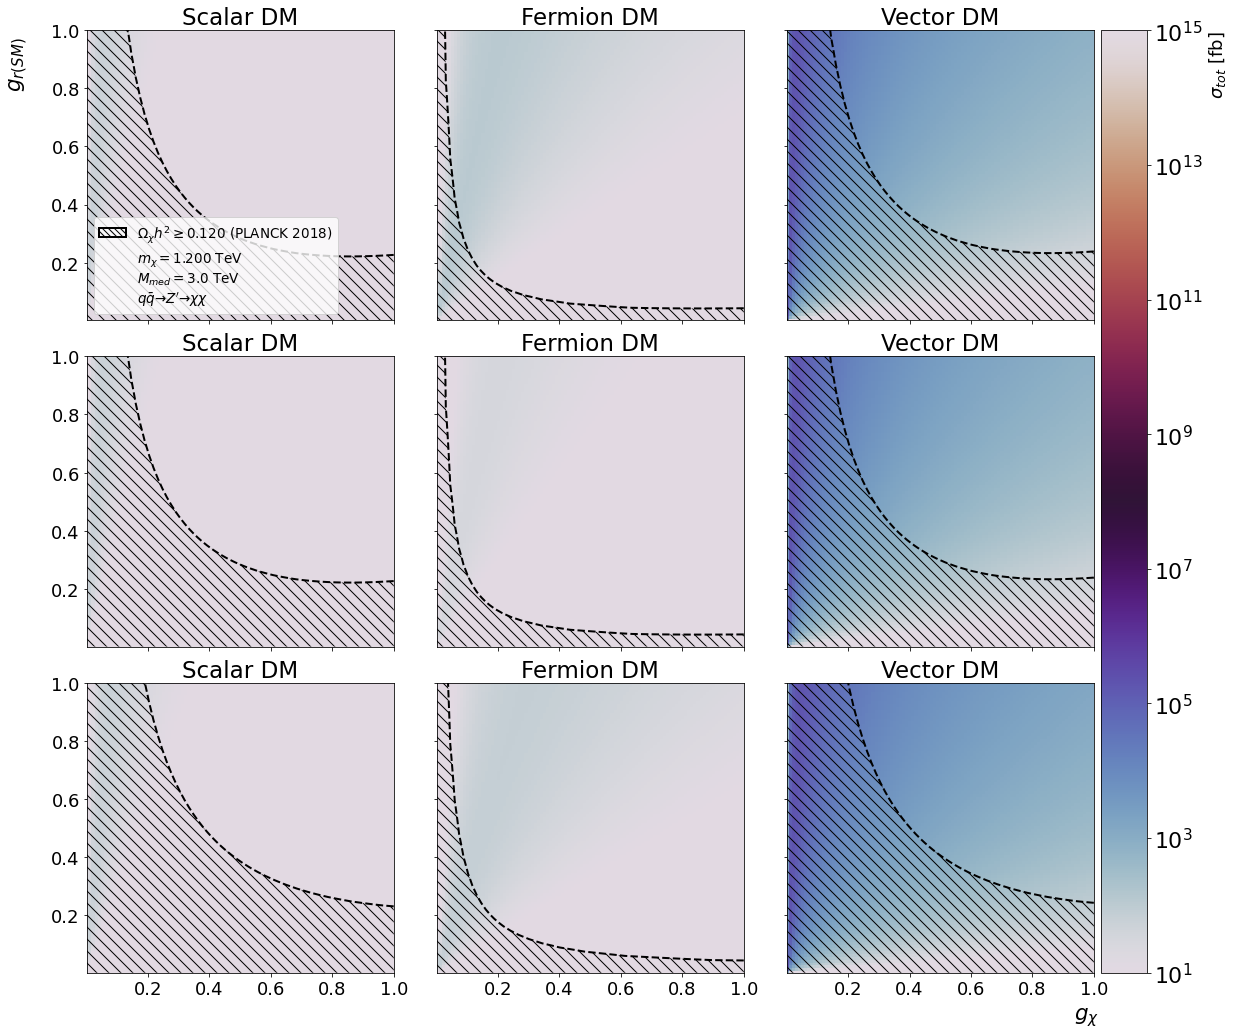

In [2]:
process = 'qq'
binsize_ohm = 70
omegarelic_coup = {}
for dmname in sig0.dmnames:
    omegarelic_coup[dmname]  = gp.load_obj(f'../myruns/{today}_omegarelic_coup_{process}_{dmname}_binsize_{binsize_ohm}.pkl')


binsize = 100
sigmaz = {}
for dmname in sig0.dmnames:
    sigmaz[dmname]  = gp.load_obj(f'../myruns/{today}_sigmaz_coup_{process}_{dmname}_binsize_{binsize}.pkl')

cb2d.cb_plot3x3(process, f'13-coupxcoup-{process}-ISR', sigmaz, omegarelic_coup, sig0.dmnames)

---
---

# coup x Mmed

In [ ]:
#gx vs Mmed

In [5]:
binsize_ohm = 50
###################################################
###################################################

mx = (Mmed/2)*0.80 # DM mass [TeV]

smax = Mmed**2

gr = 0.25 #np.linspace(1E-3, 1, binsize_ohm) # right SM/DM coupling

dM = 1/binsize_ohm 
#dmx = 0.5/binsize_ohm 
#Mediator mass [Tev] # 
Mmed_min = 0.0001
Mmed_max = 5.1
Mmed_arr = np.linspace(Mmed_min, Mmed_max, binsize_ohm)

mx = Mmed_arr / 3

gx = 1 #np.geomspace(1E-3, 1, binsize_ohm) # DM coupling
gr = np.geomspace(1E-3, 1, binsize_ohm) # DM coupling
# Define a grid
#Mmed_grid, mx_grid = np.meshgrid(Mmed_arr, mx) 

Mmed_grid, gx_grid = np.meshgrid(Mmed_arr, gx)

omegarelic_coup = {}
print('Doing coupling...')
row = 0
#  ## axial: gl = -gr ## chiral: gl = 0
process = 'qq'
Nf_x = gp.Nf_ee if process == 'ee' else gp.Nf_qq 

for fignumber, dmname in enumerate(sig0.dmnames):

    omegarelic_coup[dmname] = {}

    for cp in gp.cps:
    
        omegarelic_coup[dmname][cp] = {}

        if cp == 'V': #vetorial: gl = gr 
            param_lst = [smax, gp.me, Mmed_grid, Mmed_grid/3, gr, gr, gx_grid, dmname, Nf_x]
            omegarelic_coup[dmname][cp]['params'] = dict(zip(['s', 'mq', 'Mmed', 'mx', 'gr', 'gl', 'gx', 'dmname', 'Nf'], param_lst))

            omegarelic_coup[dmname][cp]['data'] = ohm.Ohm_numerical(smax, me, Mmed_grid , Mmed_grid/3, gr, gr, gx_grid, dmname, Nf_x)

        elif cp == 'AV': # axial: gl = -gr
            param_lst = [smax, gp.me, Mmed_grid, Mmed_grid/3, gr, -gr, gx_grid, dmname, Nf_x]
            omegarelic_coup[dmname][cp]['params'] = dict(zip(['s', 'mq', 'Mmed', 'mx', 'gr', 'gl', 'gx', 'dmname', 'Nf'], param_lst))

            omegarelic_coup[dmname][cp]['data'] = ohm.Ohm_numerical(smax, me, Mmed_grid , Mmed_grid/3, gr, -gr, gx_grid, dmname, Nf_x)

        else: # chiral: gl = 0
            param_lst = [smax, gp.me, Mmed_grid, Mmed_grid/3, gr, 0, gx_grid, dmname, Nf_x]
            omegarelic_coup[dmname][cp]['params'] = dict(zip(['s', 'mq', 'Mmed', 'mx', 'gr', 'gl', 'gx', 'dmname', 'Nf'], param_lst))

            omegarelic_coup[dmname][cp]['data'] = ohm.Ohm_numerical(smax, me, Mmed_grid , Mmed_grid/3, gr, 0, gx_grid, dmname, Nf_x)


    gp.save_obj(omegarelic_coup[dmname], f'./myruns/{today}_omegarelic_Mmed_coup_{process}_{dmname}_binsize_{binsize_ohm}.pkl')
    print(f'Done for {dmname}')



Doing coupling...
Objeto salvo em ./myruns/2023-12-28_omegarelic_Mmed_coup_qq_Scalar_binsize_50.pkl
Done for Scalar
Objeto salvo em ./myruns/2023-12-28_omegarelic_Mmed_coup_qq_Fermion_binsize_50.pkl
Done for Fermion
Objeto salvo em ./myruns/2023-12-28_omegarelic_Mmed_coup_qq_Vector_binsize_50.pkl
Done for Vector


/mnt/c/Users/Marcio/resonant-dm-relic/notebooks/utils/colorb_2D.py:662: UserWarning: The following kwargs were not used by contour: 'rasterized'
  countour_relic_line = ax[fignumber].contour(Mmed_grid_ohm, gx_grid_ohm, data_object[dmname][cp]['data'], ohm.planckdata1, colors='k', linewidths=2, linestyles='dashed', rasterized=True)


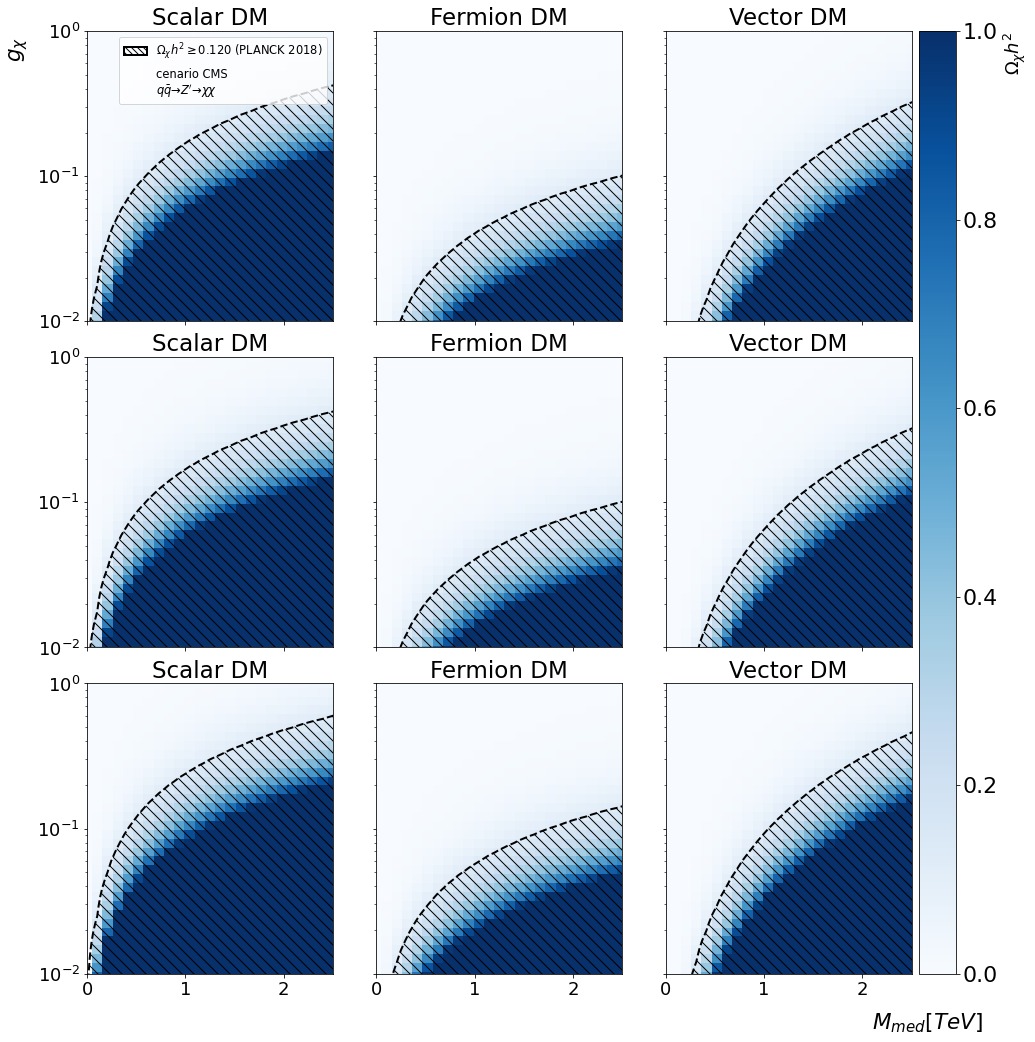

In [6]:
process = 'qq'
binsize_ohm = 50
omegarelic_coup = {}
for dmname in sig0.dmnames:
    omegarelic_coup[dmname]  = gp.load_obj(f'./myruns/{today}_omegarelic_Mmed_coup_{process}_{dmname}_binsize_{binsize_ohm}.pkl')

cb2d.cb_plot3x3_relic_Mmed(process, f'omega-relic-{process}-Mmed-coup', omegarelic_coup, sig0.dmnames)

In [45]:
Mmed_min = 0.001
Mmed_max = 5.1
Mmed_arr = np.linspace(Mmed_min, Mmed_max, 100)

mx = Mmed_arr / 3

In [6]:
binsize_ohm = 10
###################################################
###################################################

mx = (Mmed/2)*0.80 # DM mass [TeV]



gr = 0.25 #np.linspace(1E-3, 1, binsize_ohm) # right SM/DM coupling

dM = 1/binsize_ohm 
#dmx = 0.5/binsize_ohm 
#Mediator mass [Tev] # 
Mmed_min = 0.001
Mmed_max = 5.1
Mmed_arr = np.linspace(Mmed_min, Mmed_max, binsize_ohm)

mx = Mmed_arr / 3

gx = 1 #np.geomspace(1E-3, 1, binsize_ohm) # DM coupling
gr = np.geomspace(1E-3, 1, binsize_ohm) # DM coupling
# Define a grid
#Mmed_grid, mx_grid = np.meshgrid(Mmed_arr, mx) 

Mmed_grid, gr_grid = np.meshgrid(Mmed_arr, gr)

omegarelic_coup = {}
print('Doing coupling...')
row = 0
#  ## axial: gl = -gr ## chiral: gl = 0
process = 'qq'
Nf_x = gp.Nf_ee if process == 'ee' else gp.Nf_qq 
Nf_x = 18

smax = 4*mx**2
for fignumber, dmname in enumerate(sig0.dmnames):

    omegarelic_coup[dmname] = {}

    for cp in gp.cps:
    
        omegarelic_coup[dmname][cp] = {}

        if dmname != 'Fermion':
            param_lst = [smax, gp.me, Mmed_grid, Mmed_grid/3, gr_grid, gr_grid, gx, dmname, Nf_x]
            omegarelic_coup[dmname][cp]['params'] = dict(zip(['s', 'mq', 'Mmed', 'mx', 'gr', 'gl', 'gx', 'dmname', 'Nf'], param_lst))

            omegarelic_coup[dmname][cp]['data'] = 0
        
        else:


            if cp == 'V': #vetorial: gl = gr 
                param_lst = [smax, gp.me, Mmed_grid, Mmed_grid/3, gr_grid, gr_grid, gx, dmname, Nf_x]
                omegarelic_coup[dmname][cp]['params'] = dict(zip(['s', 'mq', 'Mmed', 'mx', 'gr', 'gl', 'gx', 'dmname', 'Nf'], param_lst))

                omegarelic_coup[dmname][cp]['data'] = ohm.naive_Ohm_numerical(smax, me, Mmed_grid , Mmed_grid/3, gr_grid, gr_grid, gx, dmname, Nf_x)

            elif cp == 'AV': # axial: gl = -gr
                param_lst = [smax, gp.me, Mmed_grid, Mmed_grid/3, gr_grid, -gr_grid, gx, dmname, Nf_x]
                omegarelic_coup[dmname][cp]['params'] = dict(zip(['s', 'mq', 'Mmed', 'mx', 'gr', 'gl', 'gx', 'dmname', 'Nf'], param_lst))

                omegarelic_coup[dmname][cp]['data'] = ohm.naive_Ohm_numerical(smax, me, Mmed_grid , Mmed_grid/3, gr_grid, -gr_grid, gx, dmname, Nf_x)

            else: # chiral: gl = 0
                param_lst = [smax, gp.me, Mmed_grid, Mmed_grid/3, gr_grid, 0, gx, dmname, Nf_x]
                omegarelic_coup[dmname][cp]['params'] = dict(zip(['s', 'mq', 'Mmed', 'mx', 'gr', 'gl', 'gx', 'dmname', 'Nf'], param_lst))

                omegarelic_coup[dmname][cp]['data'] = ohm.naive_Ohm_numerical(smax, me, Mmed_grid , Mmed_grid/3, gr_grid, 0, gx, dmname, Nf_x)


    gp.save_obj(omegarelic_coup[dmname], f'./myruns/{today}_naive_omegarelic_Mmed_coup_gr_{process}_{dmname}_binsize_{binsize_ohm}.pkl')
    print(f'Done for {dmname}')



Doing coupling...
Objeto salvo em ./myruns/2023-12-28_naive_omegarelic_Mmed_coup_gr_qq_Scalar_binsize_10.pkl
Done for Scalar


/mnt/c/Users/Marcio/resonant-dm-relic/notebooks/../app/models/relic_density_calc.py:219: RuntimeWarning: divide by zero encountered in double_scalars
  prefact = 1 / (8* (mx**4) * T * (sp.kn(2, x))**2)
/mnt/c/Users/Marcio/resonant-dm-relic/notebooks/../app/models/relic_density_calc.py:234: RuntimeWarning: invalid value encountered in double_scalars
  result = prefact * integral_res
/mnt/c/Users/Marcio/resonant-dm-relic/notebooks/../app/models/relic_density_calc.py:270: RuntimeWarning: divide by zero encountered in double_scalars
  result = 8.76 * (1E-11)  * (1/((np.sqrt(gst)*integral)/mx)) * (10**6) ## conversion from GeV^-2 to TeV^-2
/mnt/c/Users/Marcio/resonant-dm-relic/notebooks/../app/models/relic_density_calc.py:219: RuntimeWarning: overflow encountered in double_scalars
  prefact = 1 / (8* (mx**4) * T * (sp.kn(2, x))**2)


Objeto salvo em ./myruns/2023-12-28_naive_omegarelic_Mmed_coup_gr_qq_Fermion_binsize_10.pkl
Done for Fermion
Objeto salvo em ./myruns/2023-12-28_naive_omegarelic_Mmed_coup_gr_qq_Vector_binsize_10.pkl
Done for Vector


## nee calc

In [2]:
@np.vectorize
def super_naive2(s, mq, Mmed, mx, gr, gl, gx, dmname, Nf):

    xf = 28
    #v = np.sqrt(1 - (4*mx**2 / s))
    a = ( (0.005) * sig0.SFV(dmname+".v").sig0(s, mq, Mmed, mx, gr, gl, gx, 18) * 10**6) # GeV^-2
    b = 0
    denom = a + ((3*b) / xf)

    prefact = 0.120 * (1.6**(-10)) * xf  ## conversion from GeV^-2 to TeV^-2
    #prefact =  (1E-10) # * xf  ## conversion from GeV^-2 to TeV^-2
    #prefact = 3 * 1E-27   * 5.07 * 10**2  ## conversion from GeV^-2 to TeV^-2
    
    #LHC_cte = 4.5 * 1E-9 # TeV^2 ## last factor is a conversion from GeV^2 to TeV^2
    #sigv = (Nf * sig0.SFV("Fermion.v").sig0(s, mq, Mmed, mx, gr, gl, gx, Nf) * (1E6))
    #Ohm_h2 = LHC_cte / sigv
    Ohm_h2 = prefact / denom
    #print('b', b)
    #print(Ohm_h2)
    #print(b, 'b')
    return Ohm_h2

In [223]:
binsize_ohm = 100
###################################################
###################################################

#mx = (Mmed/2)*0.80 # DM mass [TeV]

#smax = Mmed**2

#gr = 0.25 #np.linspace(1E-3, 1, binsize_ohm) # right SM/DM coupling

dM = 1/binsize_ohm 
#dmx = 0.5/binsize_ohm 
#Mediator mass [Tev] # 
Mmed_min = 0.001
Mmed_max = 5.1
Mmed_arr = np.linspace(Mmed_min, Mmed_max, binsize_ohm)

mx = Mmed_arr / 3

## CMS coupling
gx = 1 #np.geomspace(1E-3, 1, binsize_ohm) # DM coupling
gr = 0.25
gx_arr = np.geomspace(0.001, 2, binsize_ohm) # DM coupling
gr_arr = np.geomspace(0.001, 1, binsize_ohm) # DM coupling
# Define a grid
#Mmed_grid, mx_grid = np.meshgrid(Mmed_arr, mx) 

Mmed_grid, gr_grid = np.meshgrid(Mmed_arr, gr_arr)

Mmed_grid, gx_grid = np.meshgrid(Mmed_arr, gx_arr)
omegarelic_coup = {}

print('Doing coupling...')
row = 0
#  ## axial: gl = -gr ## chiral: gl = 0
process = 'qq'
Nf_x = gp.Nf_ee if process == 'ee' else gp.Nf_qq 
#Nf_x = 18

#smax = 4*mx**2
me = gp.me

#me = 0.001
for dmname in ['Fermion']:

    omegarelic_coup[dmname] = {}

    for gc in ['gx', 'gr']:
    
        omegarelic_coup[dmname][gc] = {}

        if gc == 'gx': #vetorial: gl = gr 
            param_lst = [smax, me, Mmed_grid, Mmed_grid/3, gr, gr, gx_grid, dmname, Nf_x]
            omegarelic_coup[dmname][gc]['params'] = dict(zip(['s', 'mq', 'Mmed', 'mx', 'gr', 'gl', 'gx', 'dmname', 'Nf'], param_lst))

            omegarelic_coup[dmname][gc]['data'] = super_naive2(4*(Mmed_grid/3)**2, me, Mmed_grid , Mmed_grid/3, gr, gr, gx_grid, dmname, Nf_x)

        elif gc == 'gr': #  ## vector case only (gr = gl)
            param_lst = [smax, me, Mmed_grid, Mmed_grid/3, gr_grid, gr_grid, gx, dmname, Nf_x]
            omegarelic_coup[dmname][gc]['params'] = dict(zip(['s', 'mq', 'Mmed', 'mx', 'gr', 'gl', 'gx', 'dmname', 'Nf'], param_lst))

            omegarelic_coup[dmname][gc]['data'] = super_naive2(4*(Mmed_grid/3)**2, me, Mmed_grid , Mmed_grid/3, gr_grid, gr_grid, gx, dmname, Nf_x)



    gp.save_obj(omegarelic_coup[dmname], f'./myruns/{today}_naive_relic_CMS_Fermion_comp_coupling_binsize_{binsize_ohm}.pkl')
    print(f'Done for {dmname}')



Doing coupling...
Objeto salvo em ./myruns/2023-12-28_naive_relic_CMS_Fermion_comp_coupling_binsize_100.pkl
Done for Fermion


In [227]:
## My code for coupling
binsize_ohm = 100
###################################################
###################################################

#mx = (Mmed/2)*0.80 # DM mass [TeV]

#smax = Mmed**2

#gr = 0.25 #np.linspace(1E-3, 1, binsize_ohm) # right SM/DM coupling

dM = 1/binsize_ohm 
#dmx = 0.5/binsize_ohm 
#Mediator mass [Tev] # 
Mmed_min = 0.001
Mmed_max = 5.1
Mmed_arr = np.linspace(Mmed_min, Mmed_max, binsize_ohm)

mx = Mmed_arr / 3

## CMS coupling
gx = 1 #np.geomspace(1E-3, 1, binsize_ohm) # DM coupling
gr = 0.25
gx_arr = np.geomspace(0.001, 2, binsize_ohm) # DM coupling
gr_arr = np.geomspace(0.001, 1, binsize_ohm) # DM coupling
# Define a grid
#Mmed_grid, mx_grid = np.meshgrid(Mmed_arr, mx) 

Mmed_grid, gr_grid = np.meshgrid(Mmed_arr, gr_arr)

Mmed_grid, gx_grid = np.meshgrid(Mmed_arr, gx_arr)
omegarelic_coup = {}

print('Doing coupling...')
row = 0
#  ## axial: gl = -gr ## chiral: gl = 0
process = 'qq'
Nf_x = gp.Nf_ee if process == 'ee' else gp.Nf_qq 
#Nf_x = 18

#smax = 4*mx**2
me = gp.me
for dmname in ['Fermion']:

    omegarelic_coup[dmname] = {}

    for gc in ['gx', 'gr']:
        print(f'Doing coupling {dmname} {gc}')
        omegarelic_coup[dmname][gc] = {}

        if gc == 'gx': #vetorial: gl = gr 
            param_lst = [4*(Mmed_grid/3)**2, me, Mmed_grid, Mmed_grid/3, gr, gr, gx_grid, dmname, Nf_x]
            omegarelic_coup[dmname][gc]['params'] = dict(zip(['s', 'mq', 'Mmed', 'mx', 'gr', 'gl', 'gx', 'dmname', 'Nf'], param_lst))

            omegarelic_coup[dmname][gc]['data'] = ohm.Ohm_numerical(4*(Mmed_grid/3)**2, me, Mmed_grid , Mmed_grid/3, gr, gr, gx_grid, dmname, Nf_x)

        elif gc == 'gr': #  ## vector case only (gr = gl)
            param_lst = [4*(Mmed_grid/3)**2, me, Mmed_grid, Mmed_grid/3, gr_grid, gr_grid, gx, dmname, Nf_x]
            omegarelic_coup[dmname][gc]['params'] = dict(zip(['s', 'mq', 'Mmed', 'mx', 'gr', 'gl', 'gx', 'dmname', 'Nf'], param_lst))

            omegarelic_coup[dmname][gc]['data'] = ohm.Ohm_numerical(4*(Mmed_grid/3)**2, me, Mmed_grid , Mmed_grid/3, gr_grid, gr_grid, gx, dmname, Nf_x)



    gp.save_obj(omegarelic_coup[dmname], f'./myruns/{today}_relic_CMS_Fermion_comp_coupling_binsize_{binsize_ohm}.pkl')
    print(f'Done for {dmname}')

Doing coupling...
Doing coupling Fermion gx
Doing coupling Fermion gr
Objeto salvo em ./myruns/2023-12-28_relic_CMS_Fermion_comp_coupling_binsize_100.pkl
Done for Fermion


In [281]:
def cb_plot3x3_relic_Mmed_gr(process, figure_name, data_object, dmlist,
                      cmap = 'Blues', fsize = 18, folder = '../figures', today = datetime.date.today().strftime('%Y-%m-%d'), data_object2 = None):


    row = 0
    fignumber = 0

    for fignumber, gc in enumerate(['gx', 'gr']):
        for dmname in ['Fermion']:

            #dmname = 'Fermion'

            # Define a grid
            #cp = 'V' # vector coupling
            Mmed_grid_ohm, gc_grid_ohm = data_object[dmname][gc]['params']['Mmed'], data_object[dmname][gc]['params'][gc] 
            #mx = data_object[dmname][cp]['params']['mx']
            #Mmed = data_object[dmname][cp]['params']['Mmed']



            #Data object 2 (new line)
            if data_object2 is not None:
                Mmed_grid_ohm2, gc_grid_ohm2 = data_object2[dmname][gc]['params']['Mmed'], data_object2[dmname][gc]['params'][gc] 
            #    mx = data_object2[dmname][cp]['params']['mx']
            #Mmed = data_object[dmname][cp]['params']['Mmed']

            # Set up figure and image grid  
            if fignumber == 0:
                fig = plt.figure(figsize=(20, 8))
                ax = ImageGrid(fig, 111,          # as in plt.subplot(111)
                    nrows_ncols=(1,2),
                    axes_pad=(0.9, 0.5),
                    share_all=False,
                    cbar_location="right",
                    cbar_mode="single",
                    cbar_size="5%",
                    cbar_pad=0.10,
                    aspect=False
                    )
                fsize = 18 
            
            
            #print(data_object[dmname][cp]['data'])
            print(dmname)
            print(gc)
            im = ax[fignumber].pcolormesh(Mmed_grid_ohm, gc_grid_ohm, data_object[dmname][gc]['data'], vmin=0, vmax=1, cmap='Blues', rasterized=True) ## heat map of xsec
            countour_relic = ax[fignumber].contourf(Mmed_grid_ohm, gc_grid_ohm, data_object[dmname][gc]['data'], ohm.planckdata2[0], colors='none', hatches=['\\\\'])
            countour_relic_line = ax[fignumber].contour(Mmed_grid_ohm, gc_grid_ohm, data_object[dmname][gc]['data'], ohm.planckdata1, colors='k', linewidths=2, linestyles='dashed', rasterized=True)
            
            
            if data_object2 is not None:
                countour_relic_line = ax[fignumber].contour(Mmed_grid_ohm2, gc_grid_ohm2, data_object2[dmname][gc]['data'], ohm.planckdata1, colors='blue', linewidths=2, linestyles='solid', rasterized=True)
            labelOHM = r'${\Omega _\chi }{h^2} \geq 0.120$ (PLANCK 2018)'


            ax[0].set_ylim(0.01, 2) ## plot 'resolution' 
            ax[1].set_ylim(0.01, 1) ## plot 'resolution'   
            ax[fignumber].set_yscale('log') 
            ax[fignumber].set_xlim(0, 2.5) ## plot 'resolution'
                    

            # Colorbar
            ax[fignumber].cax.cla()
            cb = colorb.Colorbar(ax[fignumber].cax, im, )
            ax[fignumber].cax.toggle_label(True)
            cb.set_label(r'$\Omega_{\chi} h^2 $', fontsize = fsize, loc='top')  ## color bar label 
            cb.ax.tick_params(labelsize=fsize+4)


            fig.set_dpi(72)
                



            textstr = r"""Vector mediator
$m_{\chi} = M_{med} ~/ 3$
""" #\n'.join(
            #r'$M_{med} =  3 m_{\chi}$ TeV')
            #r'$M_{med} = %1.1f$ TeV' %(Mmed, )))
            ax[fignumber].axhline(y = 0.1, color='gray', linestyle='--', linewidth=0.5) 


            textstr = textstr + '\n' + gp.ee_qq[process]
            ## Plot Labels ##
            if fignumber == 0:
                ax[0].axhline(y = 1, linewidth=2, color='red', linestyle='-', label=r'$g_q=0.25$')    
                ax[0].text(.5, 0.85, r'$g_{\chi}=1.0$', ha='left', color='red', fontsize = fsize)
                #ab, = plt.plot([], [], linewidth=0, label=r'$g_q=0.25$')
                ab, = plt.plot([], [], linewidth=1, color='blue', linestyle='solid', label='CMS - arXiv:2107.13021')
                ac, = plt.plot([], [], label=textstr, color = 'None')


                # ax[0].plot([], [], linewidth=0, label=r'$g_q=0.25$')
                # ax[0].plot([], [], linewidth=1, color='blue', linestyle='solid', label='CMS - arXiv:2107.13021')
                # ax[0].plot([], [], label=textstr, color = 'None')

            else:
                ax[1].axhline(y = 0.25,  color='red', linestyle='-', label=r'$g_q=0.25$')    
                ax[1].text(0.5, 0.210, r'$g_q=0.25$', ha='left', color='red', fontsize = fsize)
                #ab, = plt.plot([], [], linewidth=0, label= r'$g_{\chi}=1.0$')
                ab, = plt.plot([], [], linewidth=1, color='blue', linestyle='solid', label='CMS - arXiv:2107.13021')
                ac, = plt.plot([], [], label=textstr, color = 'None')   

                # ax[1].plot([], [], linewidth=0, label= r'$g_{\chi}=1.0$')
                # ax[1].plot([], [], linewidth=1, color='blue', linestyle='solid', label='CMS - arXiv:2107.13021')
                # ax[1].plot([], [], label=textstr, color = 'None') 
            
     


            # DM subplot names
            ax[fignumber].set_title(f'{dmname} DM', fontsize = fsize+5)
            ax[fignumber].tick_params(axis="x", labelsize=fsize)
            ax[fignumber].tick_params(axis="y", labelsize=fsize)


                ### FORMAÇÃO DA LEGENDA (PERFEITA)
                    ### FORMAÇÃO DA LEGENDA (PERFEITA)
            
                #def legenda_perfeita(fig, countour_relic, get_legends):


            if fignumber == 0:
                countour_relic = countour_relic.legend_elements()
                get_legends = plt.gca().get_legend_handles_labels()
                plt.subplots_adjust(right=0.76)
                artists1, labels1 = countour_relic
                labels1[0] = r'${\Omega _\chi }{h^2} \geq 0.120$ (PLANCK 2018)' 
                
                current_handles, current_labels = get_legends
                
                artists2 = artists1.copy()
                labels2 = labels1.copy()
                
                print(artists1)
                print(artists2)

                artists1.extend(current_handles)
                labels1.extend(current_labels)
                artists1[0]._hatch = "\\\\\\\ "
                #artists1[0].xy = [x00, y00]
                artists1[0]._linestyle = 'dashed'
                artists1[0]._dashes = True
                artists1[0]._linewidth = 2.0
                artists1[0]._edgecolor = (0.0, 0.0, 0.0, 1.0)

                LEG =  ax[fignumber].legend(artists1, labels1, loc='upper right', fontsize = fsize-6.5, frameon=False)
            
            else:


                #print(artists1)
                print(artists2)

                artists2.extend(current_handles)
                labels2.extend(current_labels)
                artists2[0]._hatch = "\\\\\\\ "
                #artists1[0].xy = [x00, y00]
                artists2[0]._linestyle = 'dashed'
                artists2[0]._dashes = True
                artists2[0]._linewidth = 2.0
                artists2[0]._edgecolor = (0.0, 0.0, 0.0, 1.0)

                LEG =  ax[fignumber].legend(artists2, labels2, loc='upper right', fontsize = fsize-6.5, frameon=False)


            print(fignumber)
            #legenda_perfeita(fignumber, countour_relic.legend_elements(), plt.gca().get_legend_handles_labels())  

            ax[0].text(1.58,0.36, r'$g_{r}=0.25$', ha='center', color='k', fontsize = fsize-6.5) 
            ax[1].text(1.58, 0.36, r'$g_{\chi}=1.0$', ha='center', color='k', fontsize = fsize-6.5) 

            #get the extent of the largest box containing all the axes/subplots
            if fignumber ==  0:
                extents = np.array([a.get_position().extents for a in ax])  #all axes extents
                bigextents = np.empty(4)   
                bigextents[:2] = extents[:,:2].min(axis=0)
                bigextents[2:] = extents[:,2:].max(axis=0)

                #text to mimic the x and y label. The text is positioned in the middle 
                labelpad=0.02  #distance between the external axis and the text
                ylab_t = fig.text( bigextents[0]*3.55, bigextents[0]*7, r'$g_{r}$',
                    rotation='vertical', horizontalalignment = 'center', verticalalignment = 'top', size = fsize+3.5)


            if fignumber ==  1:
                extents = np.array([a.get_position().extents for a in ax])  #all axes extents
                bigextents = np.empty(4)   
                bigextents[:2] = extents[:,:2].min(axis=0)
                bigextents[2:] = extents[:,2:].max(axis=0)

                #text to mimic the x and y label. The text is positioned in the middle 
                labelpad=0.02  #distance between the external axis and the text
                xlab_t = fig.text(bigextents[2]-0.12, bigextents[1]-0.10, r'$M_{med}~[TeV]$',
                    horizontalalignment='right', verticalalignment = 'bottom', size = fsize+3.5)
                
                ylab_t = fig.text( bigextents[0]*0.65, bigextents[0]*7, r'$g_{\chi}$',
                    rotation='vertical', horizontalalignment = 'center', verticalalignment = 'top', size = fsize+3.5)
                
                

            if fignumber == 1:
                
                #fig.tight_layout()
                #plt.subplots_adjust(left=0.3, right=0.9, bottom=0.3, top=0.9)
                fig.set_dpi(72)
                fig.savefig(f'{folder}/{figure_name}.pdf', dpi=72, bbox_inches = "tight")
                    

                plt.ylabel(r'Dark Z^{\prime} coupling, $g_{\chi}$', fontsize = 20, loc='top')
                plt.xlabel(r'$SM Z^{\prime} coupling, g_r$', fontsize = 20, loc = 'right')
                plt.tick_params(axis="x", labelsize=20)
                plt.tick_params(axis="y", labelsize=20)
  
    #plt.show()

Fermion
gx
0
Fermion
gr
1


/tmp/ipykernel_25215/467261449.py:48: UserWarning: The following kwargs were not used by contour: 'rasterized'
  countour_relic_line = ax[fignumber].contour(Mmed_grid_ohm, gc_grid_ohm, data_object[dmname][gc]['data'], ohm.planckdata1, colors='k', linewidths=2, linestyles='dashed', rasterized=True)
/tmp/ipykernel_25215/467261449.py:52: UserWarning: The following kwargs were not used by contour: 'rasterized'
  countour_relic_line = ax[fignumber].contour(Mmed_grid_ohm2, gc_grid_ohm2, data_object2[dmname][gc]['data'], ohm.planckdata1, colors='blue', linewidths=2, linestyles='solid', rasterized=True)


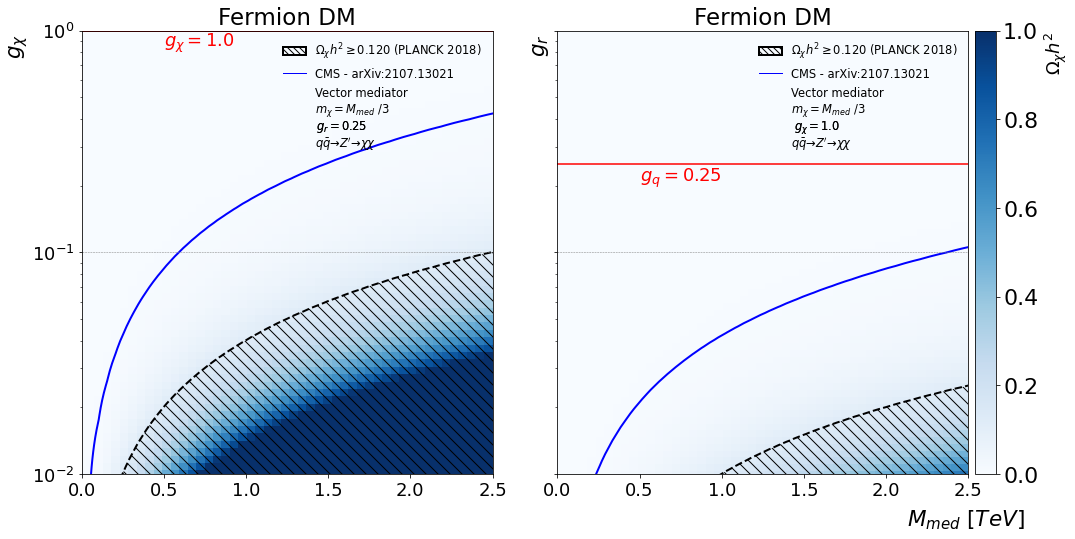

In [282]:
process = 'qq'
binsize_ohm = 100
omegarelic_coup = {}
for dmname in sig0.dmnames:
    omegarelic_coup[dmname]  = gp.load_obj(f'./myruns/{today}_relic_CMS_Fermion_comp_coupling_binsize_{binsize_ohm}.pkl')


process = 'qq'
binsize_ohm = 100
omegarelic_coup2 = {}
for dmname in sig0.dmnames:
    omegarelic_coup2[dmname]  = gp.load_obj(f'./myruns/{today}_naive_relic_CMS_Fermion_comp_coupling_binsize_{binsize_ohm}.pkl')

#cb2d.cb_plot3x3_relic_Mmed(process, f'omega-relic-{process}-Mmed-coup', omegarelic_coup, sig0.dmnames)


cb_plot3x3_relic_Mmed_gr(process, f'naive-omega-relic-{process}-Mmed-coup', omegarelic_coup, sig0.dmnames, data_object2=omegarelic_coup2 )